# Australian Open 2020: Winner Predictor
## Models comparison
##### Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
##### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])
print('Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.')
baseline_model(full_dataset)

Baseline ("stupid") models, or the lower bound on accuracy that we wish to improve upon.
Player with higher rank wins. Accuracy: 0.34
Player with higher avg bet wins. Accuracy: 0.3


In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,MaxW,MaxL,AvgW,AvgL,WBD,WHand,WBHand,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1.67,2.60,1.58,2.36,1981-09-20,L,1.0,NaT,NaN,NaN
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,2.10,1.85,1.99,1.76,1986-09-07,R,2.0,1974-05-05,L,2.0
2,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,4.75,1.33,3.63,1.27,1987-02-10,R,2.0,1985-08-07,R,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Marchenko I.,...,1.81,2.20,1.72,2.04,1987-09-08,R,2.0,1987-08-22,L,2.0
4,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Tsonga J.W.,...,1.08,14.50,1.06,8.73,1985-04-17,R,2.0,NaT,NaN,NaN


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23730 entries, 0 to 23729
Data columns (total 48 columns):
ATP           23730 non-null int32
Location      23730 non-null object
Tournament    23730 non-null object
Date          23730 non-null datetime64[ns]
Series        23730 non-null object
Court         23730 non-null object
Surface       23730 non-null object
Round         23730 non-null object
Best of       23730 non-null int32
Winner        23730 non-null object
Loser         23730 non-null object
WRank         23720 non-null float64
LRank         23681 non-null float64
WPts          23722 non-null float64
LPts          23682 non-null float64
W1            23579 non-null float64
L1            23581 non-null float64
W2            23356 non-null float64
L2            23356 non-null float64
W3            11210 non-null float64
L3            11210 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23730.0,32.951791,18.113622,1.000,19.00,33.00,49.00,67.00
Best of,23730.0,3.384576,0.788213,3.000,3.00,3.00,3.00,5.00
WRank,23720.0,56.727150,70.846344,1.000,16.00,40.00,74.00,1890.00
LRank,23681.0,87.091339,109.099050,1.000,34.00,62.00,100.00,2159.00
WPts,23722.0,1987.782733,2475.760878,1.000,694.00,1060.00,2030.00,16950.00
LPts,23682.0,1129.778397,1297.634746,1.000,558.00,789.50,1197.00,16950.00
W1,23579.0,5.807371,1.224677,0.000,6.00,6.00,6.00,7.00
L1,23581.0,4.106442,1.834233,0.000,3.00,4.00,6.00,7.00
W2,23356.0,5.783781,1.245778,0.000,6.00,6.00,6.00,7.00
L2,23356.0,3.952989,1.857367,0.000,3.00,4.00,6.00,7.00


#### Generation of training, validation and test sets

In [6]:
features_to_drop = ['Best of', 'Surface', 'Court', 'WHand', 'WBHand', 'LHand', 'LBHand']
features_to_add = ['elo', 'diff', 'age']
labels = 'duplicate'
X_train, Y_train = preprocess_data(max_date = 2017,
                                   features_to_drop = features_to_drop,
                                   features_to_add = features_to_add,
                                   labels = labels)
X_valid, Y_valid = preprocess_data(min_date = 2018, 
                                   max_date = 2018, 
                                   features_to_drop = features_to_drop, 
                                   features_to_add = features_to_add,
                                   labels = labels)
X_test, Y_test = preprocess_data(min_date = 2019, 
                                 max_date = 2020, 
                                 features_to_drop = features_to_drop, 
                                 features_to_add = features_to_add,
                                 labels = labels)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 27682
Data columns (total 14 columns):
Series      27682 non-null int64
Round       27682 non-null int64
P1Rank      27682 non-null int32
P2Rank      27682 non-null int32
P1Pts       27682 non-null int32
P2Pts       27682 non-null int32
WElo        27682 non-null float64
LElo        27682 non-null float64
ProbaElo    27682 non-null float64
P1Age       27682 non-null float64
P2Age       27682 non-null float64
AgeDiff     27682 non-null float64
RankDiff    27682 non-null int32
PtsDiff     27682 non-null int32
dtypes: float64(6), int32(6), int64(2)
memory usage: 2.5 MB


In [8]:
X_train.head()

,Series,Round,P1Rank,P2Rank,P1Pts,P2Pts,WElo,LElo,ProbaElo,P1Age,P2Age,AgeDiff,RankDiff,PtsDiff
0,0,0,40,43,1031,975,1500.0,1500.0,0.5,24.3,36.7,-12.4,-3,56
1,0,0,37,208,1128,239,1500.0,1500.0,0.5,27.2,18.2,9.0,-171,889
2,0,0,64,41,785,1005,1500.0,1500.0,0.5,23.1,26.0,-2.9,23,-220
3,0,0,48,79,940,622,1500.0,1500.0,0.5,46.5,27.5,19.0,-31,318
4,0,0,8,138,3665,398,1500.0,1500.0,0.5,28.3,25.4,2.9,-130,3267


In [9]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,27682.0,1.419334,1.496022,0.000000,0.000000,1.000000,2.000000,4.000000
Round,27682.0,1.576620,2.086476,0.000000,0.000000,1.000000,2.000000,7.000000
P1Rank,27682.0,67.979806,107.583328,1.000000,21.000000,46.000000,81.000000,2160.000000
P2Rank,27682.0,67.979806,107.583328,1.000000,21.000000,46.000000,81.000000,2160.000000
P1Pts,27682.0,1733.647280,2278.934103,0.000000,639.000000,947.000000,1690.000000,16950.000000
P2Pts,27682.0,1733.647280,2278.934103,0.000000,639.000000,947.000000,1690.000000,16950.000000
WElo,27682.0,1589.766223,152.479444,1194.436139,1496.942017,1566.256843,1670.703121,2235.205073
LElo,27682.0,1589.766223,152.479444,1194.436139,1496.942017,1566.256843,1670.703121,2235.205073
ProbaElo,27682.0,0.500000,0.196566,0.007144,0.362286,0.500000,0.637714,0.992856
P1Age,27682.0,28.317517,5.395030,12.200000,25.200000,27.800000,30.500000,57.800000


#### Models training and tuning

Max accuracy (validation, training): (0.859, 1.0)
Criterion: entropy
Splitter: best
Max depth: 85
Max leaves: None
Execution took 2.76 min


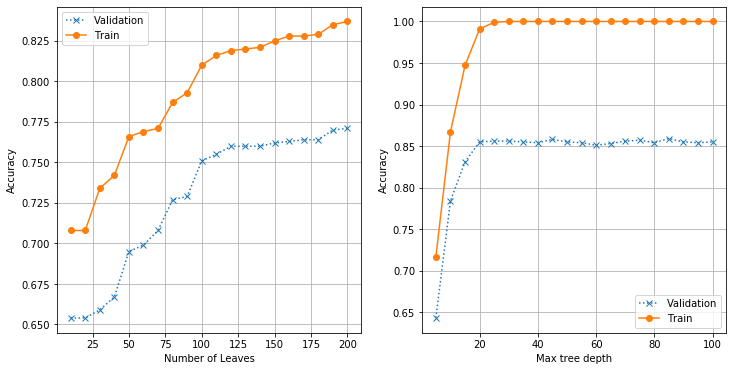

In [10]:
dt = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.944, 1.0)
Boostrap: True
N. estimators: 150
Max samples: 1.0
Tree criterion: entropy
Execution took 11.31 min


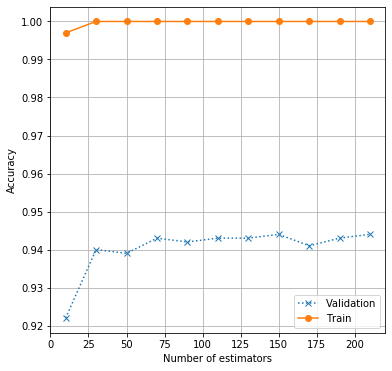

In [11]:
bagged_dt = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.989, 1.0)
N. estimators: 250
Learning rate: 0.1
Tree criterion: gini
Execution took 69.47 min


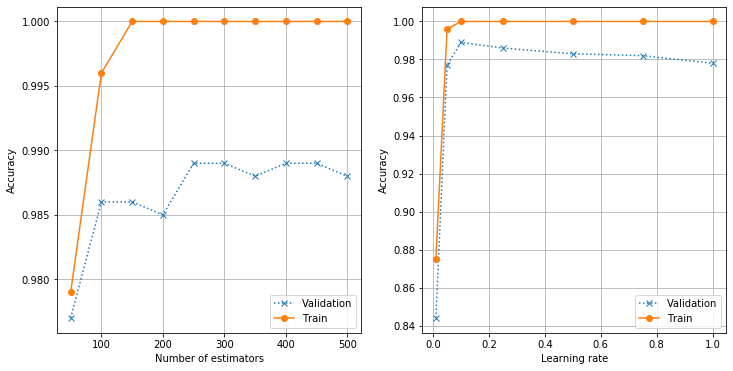

In [16]:
boosted_dt = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.943, 1.0)
N. estimators: 300
Criterion: entropy
Bootstrap: True
Features criterion (None means all features): None
Max tree depth: 20
Execution took 19.95 min


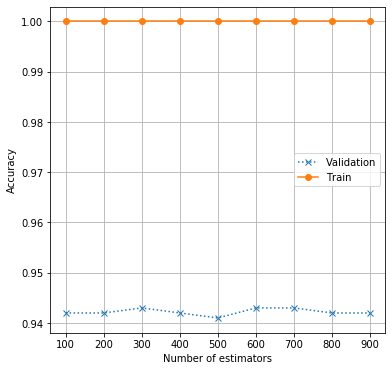

In [17]:
rf = build_random_forest(X_train, Y_train, X_valid, Y_valid)

#### Reports:
- Decision boundary of each model
- Features importance for model that supports it
- Finally, accuracy on test set

In [18]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt),
          ('AdaBoost', boosted_dt),
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


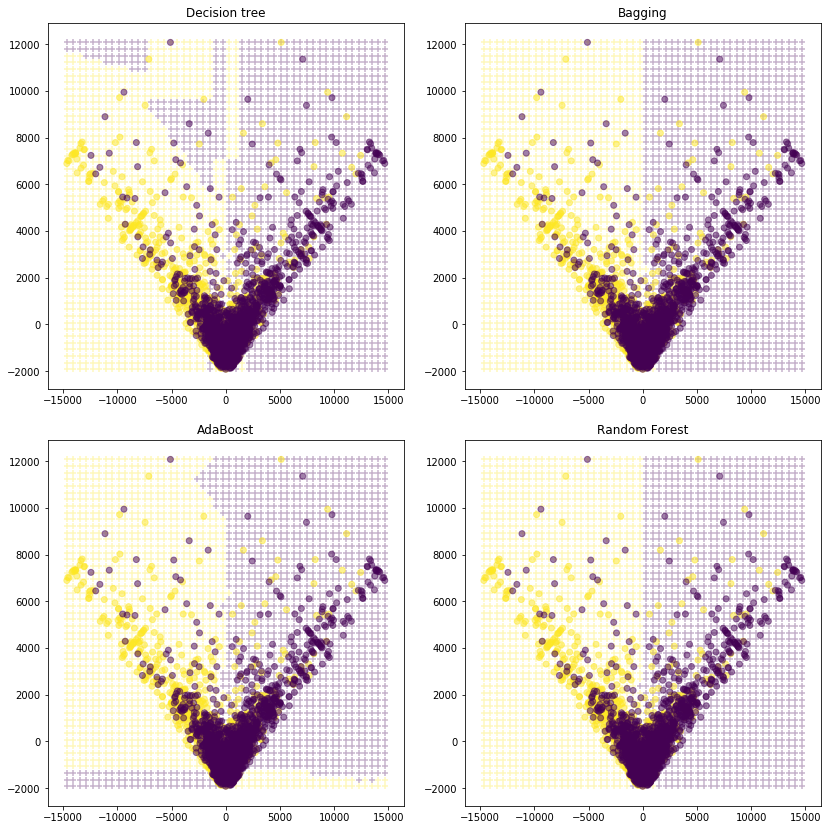

In [19]:
model_decision_boundary(models, X_test, Y_test)

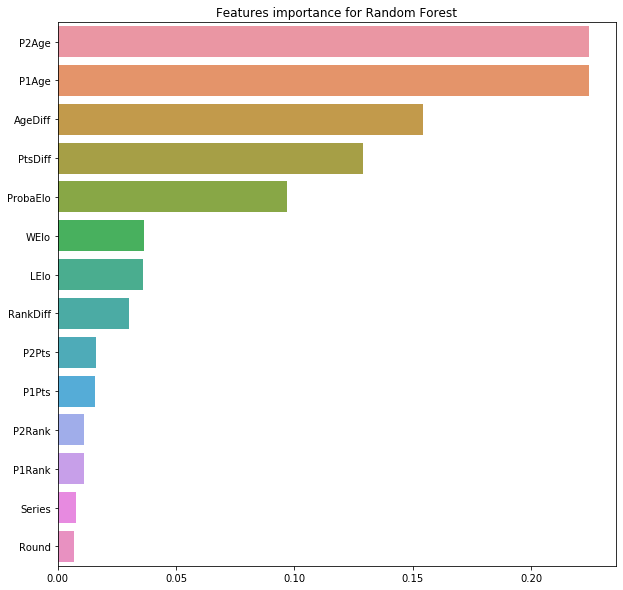

In [20]:
feature_importance(X_train, rf, 'Random Forest')

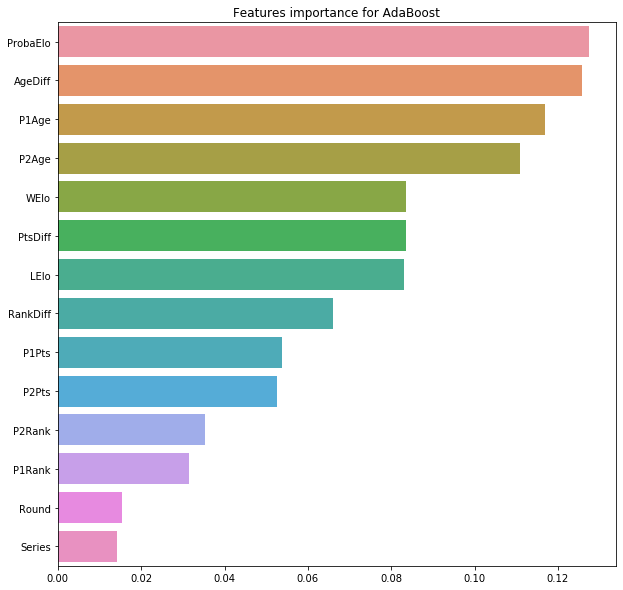

In [21]:
feature_importance(X_train, boosted_dt, 'AdaBoost')

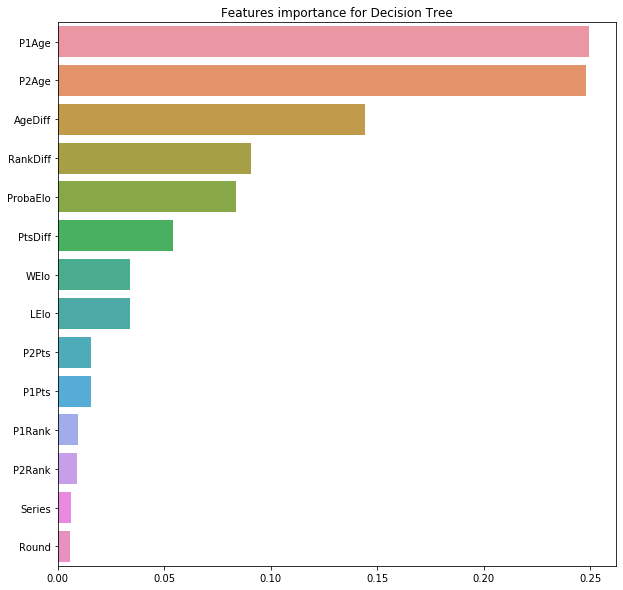

In [22]:
feature_importance(X_train, dt, 'Decision Tree')

In [23]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2421
           1       0.88      0.87      0.87      2421

    accuracy                           0.87      4842
   macro avg       0.87      0.87      0.87      4842
weighted avg       0.87      0.87      0.87      4842


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2421
           1       0.95      0.95      0.95      2421

    accuracy                           0.95      4842
   macro avg       0.95      0.95      0.95      4842
weighted avg       0.95      0.95      0.95      4842


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2421
           1       0.98      0.98      0.98      2421

    accuracy                           0.98      4842
   macro avg       0.98      0.98      0.98      4842
weighted